In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

import pandas as pd
import joblib
import json
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")

In [106]:
from alternative_image_clustering.data.dataset import Dataset


datasets = [
    "cards",
    "fruits360",
    "gtsrb",
    "nrobjects"
]

base_dir = "/mnt/data/stephana93dm/storage/projects/alternative_image_clustering"
img_dataset = Dataset(
    base_dir=base_dir,
    dataset_name="fruit360",
    embedding_type= "image"
)
dataset = Dataset(
    base_dir=base_dir,
    dataset_name="gtsrb",
    embedding_type= "sbert_concat"
)

In [84]:
from alternative_image_clustering.pgacc import run_pgacc

l = run_pgacc(
    base_dir= "/mnt/data/stephana93dm/storage/projects/alternative_image_clustering",
    dataset_name="cards",
    embedding_type= "sbert_concat",
    aggregation_strategy= "selection",
    threshhold= 0.55,
    similarity_metric="ami",
    random_state= 45
)

Start initial
Start linkage
Adaption


Batches:   0%|          | 0/251 [00:00<?, ?it/s]

In [ ]:
l["splitting"]

[array([0, 1, 3]), array([ 4,  6,  7,  8,  9, 10, 11])]

In [ ]:
l

{'aggregation_strategy': 'selection',
 'threshold': 0.55,
 'Z_matrix': array([[ 8.        , 11.        ,  0.18989298,  2.        ],
        [ 9.        , 12.        ,  0.26805845,  3.        ],
        [ 7.        , 13.        ,  0.29339665,  4.        ],
        [10.        , 14.        ,  0.36441788,  5.        ],
        [ 0.        ,  1.        ,  0.36941286,  2.        ],
        [ 4.        , 15.        ,  0.4770354 ,  6.        ],
        [ 3.        , 16.        ,  0.50987797,  3.        ],
        [ 6.        , 17.        ,  0.52720259,  7.        ],
        [18.        , 19.        ,  0.57272733, 10.        ],
        [ 2.        , 20.        ,  0.6506786 , 11.        ],
        [ 5.        , 21.        ,  0.8763031 , 12.        ]]),
 'similarity_metric': 'ami',
 'pred_labels': [array([3, 3, 2, ..., 3, 1, 0], dtype=int32),
  array([3, 0, 1, ..., 3, 2, 2], dtype=int32)],
 'metrics': {'fruit': {'AMI': 0.36895207013614606,
   'NMI': 0.36939277330282694,
   'ARI': 0.3092485325896

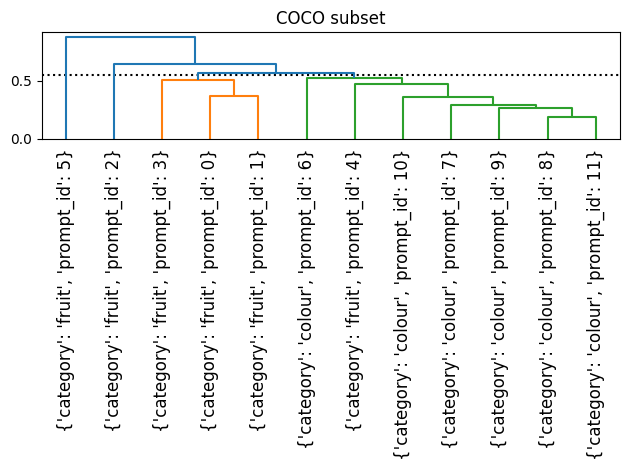

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# dists = 1-l["similarities"]
# np.fill_diagonal(dists, 0)

th = 0.55

Z = l["Z_matrix"]
fix, ax = plt.subplots()
plt.title("COCO subset")
plt.axhline(th, color="black", linestyle="dotted")
dn = dendrogram(Z, color_threshold=th, labels=l["names"])
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig("gosc_coco.png")

In [43]:
Z

array([[ 8.        , 11.        ,  0.1966728 ,  2.        ],
       [ 7.        , 12.        ,  0.22858394,  3.        ],
       [ 9.        , 13.        ,  0.290849  ,  4.        ],
       [10.        , 14.        ,  0.40752312,  5.        ],
       [ 0.        ,  3.        ,  0.51351347,  2.        ],
       [ 4.        , 16.        ,  0.51545327,  3.        ],
       [ 1.        , 17.        ,  0.5176495 ,  4.        ],
       [ 6.        , 15.        ,  0.57987891,  6.        ],
       [ 2.        , 18.        ,  0.64062942,  5.        ],
       [19.        , 20.        ,  0.67903291, 11.        ],
       [ 5.        , 21.        ,  0.89035387, 12.        ]])

In [33]:
all_labels

NameError: name 'all_labels' is not defined

In [92]:
splitting[0]

array([ 0,  7,  8,  9, 10, 11, 12, 13])

In [89]:
all_labels.shape

(14, 4856)

In [18]:
cat_1_labels = all_labels[splitting[0]]
cat_2_labels = all_labels[splitting[1]]

cat_1_labels.shape, cat_2_labels.shape

((8, 4856), (3, 4856))

In [74]:
np.array(pred_labels).shape

(2, 4856)

In [75]:
dataset.get_full_clustering_labels().shape

(4856, 2)

In [82]:
from alternative_image_clustering.metrics import get_metrics, get_multiple_labeling_metrics


get_multiple_labeling_metrics(
    labels_true=dataset.get_full_clustering_labels(),
    labels_pred=np.array(pred_labels).T,
    categories=dataset.get_categories()
)

{'fruit': {'AMI': 0.3089244705938159,
  'NMI': 0.30942002266596474,
  'ARI': 0.1830984310608413,
  'ACC': 0.5685749588138386},
 'colour': {'AMI': 0.6472161601588393,
  'NMI': 0.6474614827289266,
  'ARI': 0.5602229780851827,
  'ACC': 0.7767710049423394}}

In [23]:
from itertools import combinations

max_level = 4

comb_ids = [list(comb) for i in range(1, max_level + 1) for comb in combinations(range(max_level), i)]
print(list(combinations(range(max_level), 4)))
comb_ids

[(0, 1, 2, 3)]


[[0],
 [1],
 [2],
 [3],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 2],
 [1, 3],
 [2, 3],
 [0, 1, 2],
 [0, 1, 3],
 [0, 2, 3],
 [1, 2, 3],
 [0, 1, 2, 3]]